In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
import seaborn as sns

In [413]:
df = pd.read_csv('diamonds.csv', index_col = [0])
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [414]:
df = df.reset_index(drop = True) # back to zero indexing

In [415]:
'''cut_dict = {'Fair':0.2, 'Good':0.4, 'Very Good':0.6, 'Premium':0.8, 'Ideal':1.0}
color_dict = {'J':0.14285, 'I':0.28571, 'H':0.42857, 'G':0.57142, 'F':0.71428,
              'E':0.85714, 'D': 1.0}
clarity_dict = {'I1':0.125, 'SI2':0.25, 'SI1':0.375, 'VS2':0.5, 'VS1': 0.625,
                'VVS2':0.75, 'VVS1':0.875, 'IF':1.0}'''


"cut_dict = {'Fair':0.2, 'Good':0.4, 'Very Good':0.6, 'Premium':0.8, 'Ideal':1.0}\ncolor_dict = {'J':0.14285, 'I':0.28571, 'H':0.42857, 'G':0.57142, 'F':0.71428,\n              'E':0.85714, 'D': 1.0}\nclarity_dict = {'I1':0.125, 'SI2':0.25, 'SI1':0.375, 'VS2':0.5, 'VS1': 0.625,\n                'VVS2':0.75, 'VVS1':0.875, 'IF':1.0}"

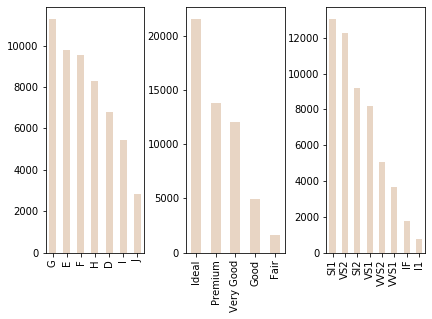

In [416]:
fig, ax = plt.subplots(1, 3)
fig.tight_layout()
plt.subplot(1,3,1)
df['color'].value_counts().plot(kind='bar');
plt.subplot(1,3,2)
df['cut'].value_counts().plot(kind='bar');
plt.subplot(1,3,3)
df['clarity'].value_counts().plot(kind='bar');

In [417]:
totals = df.groupby(['clarity', 'color']).count()

In [418]:
#print(totals)
totals.head()
#print(totals['carat'].sum())
#print(totals.get_group('I1'))
print(totals.keys())
carat_df = totals['carat']
#carat_df.head()


Index(['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


col_0    count
clarity       
I1         741
IF        1790
SI1      13065
SI2       9194
VS1       8171
VS2      12258
VVS1      3655
VVS2      5066
  quality  count
0      I1    741
1     SI2   9194
2     SI1  13065
3     VS2  12258
4     VS1   8171
5    VVS2   5066
6    VVS1   3655
7      IF   1790


'carat_table2 = pd.crosstab(index=new_df["quality"], columns=new_df["count"])\nprint(carat_table2)\ncarat_table2.plot(kind="bar", \n                 figsize=(8,8),\n                 stacked=True)'

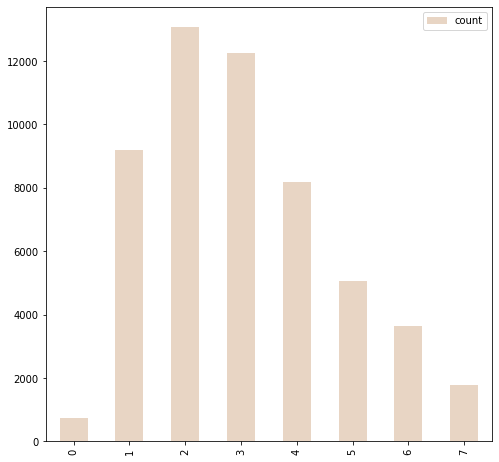

In [419]:
carat_table = pd.crosstab(index=df["clarity"], columns="count")
print(carat_table)
qual_order_x = ['I1', 'SI2', 'SI1', 'VS2', 'VS1','VVS2', 'VVS1', 'IF']
qual_counts = []
for each in qual_order_x:
    count_val = carat_table['count'][each]
    qual_counts.append(count_val)
#plt.bar(qual_order_x, qual_counts, stacked = True)
#carat_table.plot(kind="bar", figsize=(8,8))
#new_df = pd.DataFrame(qual_order_x, qual_counts)
#new_df.head()
data_tuples = list(zip(qual_order_x, qual_counts))
new_df = pd.DataFrame(data_tuples, columns = ['quality', 'count'])
print(new_df)
new_df.plot(kind="bar", figsize=(8,8), stacked=True)
'''carat_table2 = pd.crosstab(index=new_df["quality"], columns=new_df["count"])
print(carat_table2)
carat_table2.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)'''

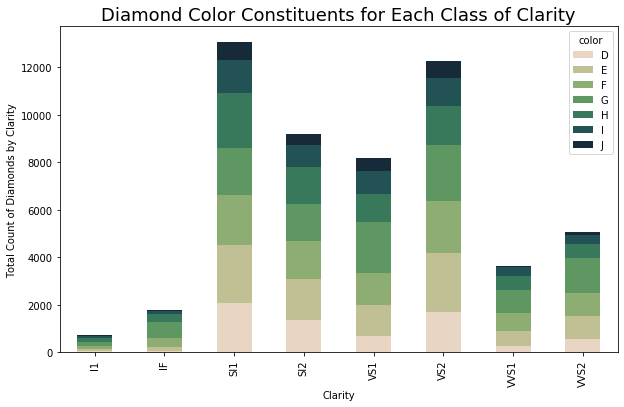

In [420]:
import seaborn as sns

pal = sns.cubehelix_palette(7, start = 0, rot = -.7)
sns.set_palette(pal, n_colors=7)

title = 'Diamond Color Constituents for Each Class of Clarity'
x_label = "Clarity"
y_label = "Total Count of Diamonds by Clarity"


carat_table = pd.crosstab(index = df["clarity"], columns = df["color"])
ax = carat_table.plot(kind="bar", figsize = (10,6), color = pal, stacked=True)
ax.set_title(title, fontsize = 18)
ax.set(xlabel = x_label, ylabel = y_label)
plt.show()

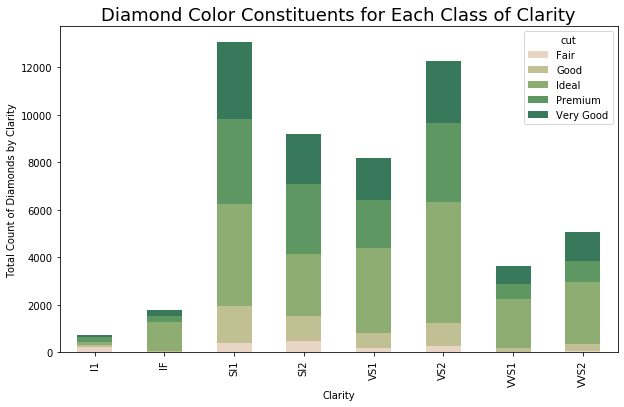

In [421]:
title = 'Diamond Color Constituents for Each Class of Clarity'
x_label = "Clarity"
y_label = "Total Count of Diamonds by Clarity"


carat_table = pd.crosstab(index = df["clarity"], columns = df["cut"])
ax = carat_table.plot(kind="bar", figsize = (10,6), color = pal, stacked=True)
ax.set_title(title, fontsize = 18)
ax.set(xlabel = x_label, ylabel = y_label)
plt.show()

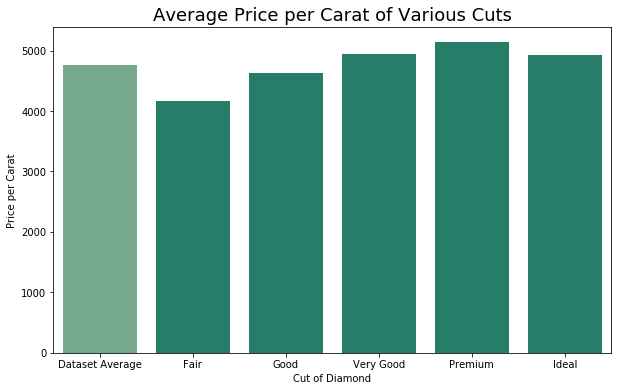

In [409]:
cut_list = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

cut_averages = df.groupby(['cut']).mean()
cut_averages['price per carat'] = cut_averages['price']/cut_averages['carat']
cut_averages['index'] = cut_averages.index
cut_averages.set_index('index', inplace = True)

price_by_cut = []
for each in cut_list:
    avg_price = cut_averages.loc[each, 'price per carat']
    price_by_cut.append(avg_price)
    

avg_price = np.mean(price_by_cut)
price_by_cut.insert(0, avg_price)
cut_list.insert(0, 'Dataset Average')
  
    
title = 'Average Price per Carat of Various Cuts'
x_label = 'Cut of Diamond'
y_label = 'Price per Carat'
clrs = ['#1A8B71' if x != 'Dataset Average' else '#6FB28C' for x in cut_list]
plt.figure(figsize = (10,6))
ax = sns.barplot(x = cut_list, y = price_by_cut, palette = clrs)
ax.set_title(title, fontsize = 18)
ax.set(xlabel = x_label, ylabel = y_label)
plt.show()


In [422]:
def price_bar_chart(variable, variable_list, df):
    print(variable_list)
    cut_averages = df.groupby([variable]).mean()
    cut_averages['price per carat'] = cut_averages['price']/cut_averages['carat']
    cut_averages['index'] = cut_averages.index
    cut_averages.set_index('index', inplace = True)

    price_by_cut = []
    for each in variable_list:
        print(variable_list)
        avg_price = cut_averages.loc[each, 'price per carat']
        price_by_cut.append(avg_price)


    avg_price = np.mean(price_by_cut)
    price_by_cut.insert(0, avg_price)
    variable_list.insert(0, 'Dataset Average')
    

    title = 'Average Price per Carat of Various ' + variable 
    x_label = variable + ' of Diamond'
    y_label = 'Price per Carat'
    clrs = ['#1A8B71' if x != 'Dataset Average' else '#6FB28C' for x in variable_list]
    plt.figure(figsize = (10,6))
    ax = sns.barplot(x = variable_list, y = price_by_cut, palette = clrs)
    ax.set_title(title, fontsize = 18)
    ax.set(xlabel = x_label, ylabel = y_label)
    plt.show()
    

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']


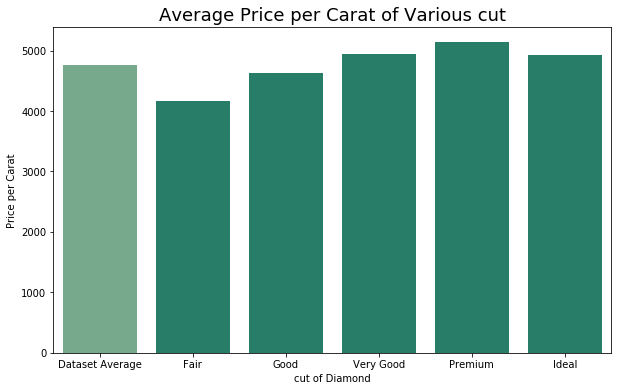

In [424]:
cut_list = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
price_bar_chart('cut', cut_list, df)